In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [3]:
df = pd.read_csv('bbc_text_cls.csv')

In [4]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [5]:
# map classes to integers from 0, ... , K-1
df['labels'].astype('category').cat.codes

,0
0,0
1,0
2,0
3,0
4,0
...,...
2220,4
2221,4
2222,4
2223,4


In [6]:
df['targets'] = df['labels'].astype('category').cat.codes

In [7]:
df_train, df_test = train_test_split(df, test_size=0.3)

In [8]:
tfidf = TfidfVectorizer(stop_words='english')
Xtrain = tfidf.fit_transform(df_train['text'])
Xtest = tfidf.transform(df_test['text'])

In [9]:
Ytrain = df_train['targets']
Ytest = df_test['targets']

In [10]:
# number of classes
K = df['targets'].nunique()
K

5

In [11]:
# input dimensions
D = Xtrain.shape[1]
D

25386

In [12]:
# build model
i = Input(shape=(D, ))
x = Dense(300, activation='relu')(i)
x = Dense(K)(x) # softmax included in loss
model = Model(inputs=i, outputs=x)

In [13]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 25386)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │       7,616,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,617,605 (29.06 MB)

 Trainable params: 7,617,605 (29.06 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

In [16]:
Xtrain = Xtrain.toarray()
Xtest = Xtest.toarray()

In [17]:
r = model.fit(
    Xtrain, Ytrain,
    validation_data=(Xtest, Ytest),
    epochs=7,
    batch_size=128
)

Epoch 1/7
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 226ms/step - accuracy: 0.6476 - loss: 1.5347 - val_accuracy: 0.9491 - val_loss: 1.1805
Epoch 2/7
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 260ms/step - accuracy: 0.9887 - loss: 0.9968 - val_accuracy: 0.9626 - val_loss: 0.7160
Epoch 3/7
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.9984 - loss: 0.5063 - val_accuracy: 0.9731 - val_loss: 0.4112
Epoch 4/7
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - accuracy: 0.9997 - loss: 0.2217 - val_accuracy: 0.9746 - val_loss: 0.2614
Epoch 5/7
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 1.0000 - loss: 0.1093 - val_accuracy: 0.9731 - val_loss: 0.1939
Epoch 6/7
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 236ms/step - accuracy: 1.0000 - loss: 0.0607 - val_accuracy: 0.9746 - val_loss: 0.1605
Epoch 7/7
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 1.0000 - loss: 0.0370 - val_accuracy: 0.9731 - val_loss: 0.1421


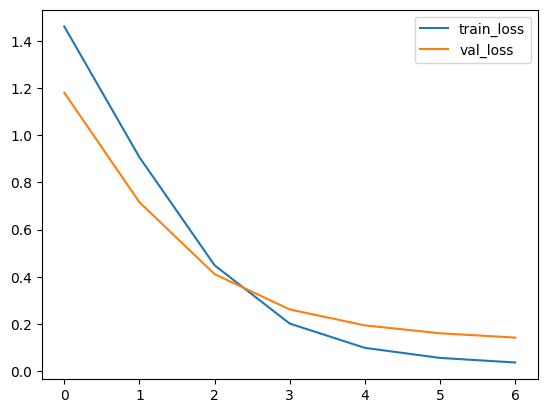

In [18]:
# plot loss per iteration
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

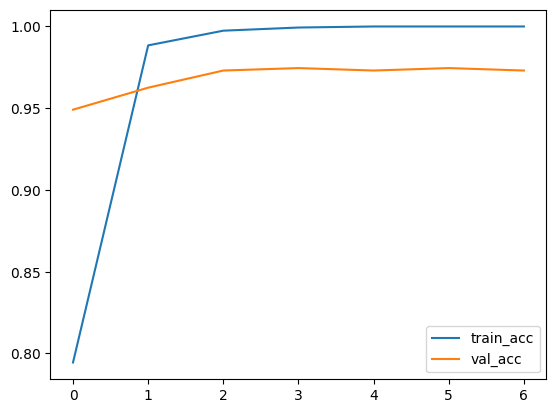

In [19]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

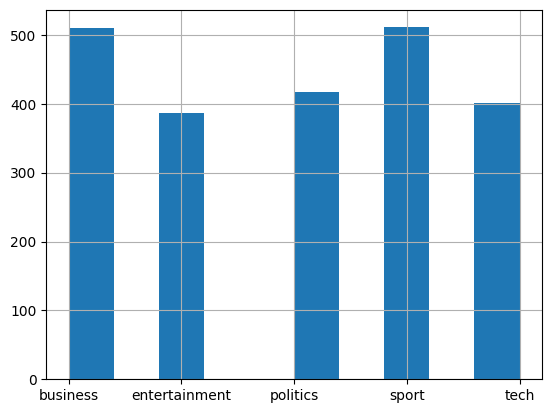

In [20]:
df['labels'].hist();